<a href="https://colab.research.google.com/github/krishnadixit05/AI/blob/main/AI_post_lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import yfinance as yf

In [ ]:
# Step 1: Data Collection
ticker = 'TCS.NS'  # TCS ticker symbol on NSE
start_date = '2020-01-01'
end_date = '2024-03-31'
data = yf.download(ticker, start=start_date, end=end_date)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
closing_prices = data['Close'].values.reshape(-1, 1)


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)


In [ ]:
X_train = []
y_train = []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Step 3: Model Building
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1333
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0019
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0014
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0016
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0014
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0014
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0012
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0012
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0012
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0011
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0013
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0011
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0012
Epoch 15/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - lo

In [ ]:
test_data = scaled_data[-(60+30):]  # Last 60 days + 30 days to predict
X_test = []
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Predicting the next 30 days
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


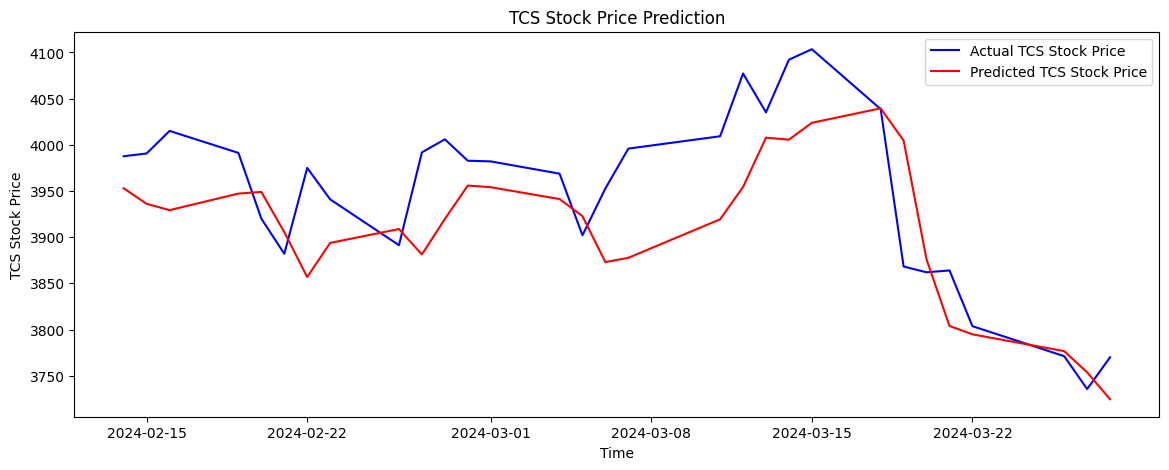

In [ ]:
# Visualize the results
plt.figure(figsize=(14, 5))
plt.plot(data.index[-30:], closing_prices[-30:], color='blue', label='Actual TCS Stock Price')
plt.plot(data.index[-30:], predicted_stock_price, color='red', label='Predicted TCS Stock Price')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()